#-[0]. {Optional} Load google drive for csv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/My Drive/URJC/Cours/'Reconocimiento patrones'

!ls

/content/drive/My Drive/URJC/Cours/Reconocimiento patrones
'Cour 1'	     Datasets
'Cour 10 (21oct)'   'Guía de repaso (Respuestas).gdoc'
'cour 12 (28 oct)'   ml_map.png
'Cour 2'	     notas-reco-patrones.pdf
'cour 3 (30sept)'   '[Perso] de Guía de repaso (Respuestas).gdoc'
'cour 4'	     Reto1_2021.pdf
'cour 5 (4oct)'      Reto2_2021.pdf
'cour 6 (7oct)'


#-[1]. Importing package needed


In [5]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sb

%matplotlib inline
from matplotlib import pyplot as plt

# seed = 1234 #<- random generator seed (0 to get randomness)
seed = 0

#-[2]. Load data from CSV : X_all_set (features) and Y_all_set (labels)

In [8]:
X_all_set = pd.read_csv('Datasets/reto3_trainX.csv')
Y_all_set = pd.read_csv('Datasets/reto3_trainY.csv')

print("Features shape : " + str(X_all_set.shape))
print("Label shape : " + str(Y_all_set.shape))

Features shape : (116202, 54)
Label shape : (116202, 1)


In [9]:
pd.set_option("display.max_columns", None)
X_all_set.head()

,altitud,azimut,inclinacion,DH_agua,DV_agua,DH_camino,sombra_9am,sombra_12pm,sombra_3pm,DH_fuego,reserva_1,reserva_2,reserva_3,Reserva_4,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40
0,3351,354,19,450,95,1064,185,203,153,711,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2995,84,7,481,30,5154,231,227,129,5488,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2884,72,25,210,-45,466,239,183,60,2123,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,3139,76,11,301,58,1368,234,220,117,3282,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3018,312,17,30,10,1719,172,225,193,1961,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [10]:
Y_all_set.head()

,tipo_bosque
0,1
1,2
2,2
3,1
4,1


In [11]:
names = X_all_set.columns
for i in names:
  print(i, end='   ')

altitud   azimut   inclinacion   DH_agua   DV_agua   DH_camino   sombra_9am   sombra_12pm   sombra_3pm   DH_fuego   reserva_1   reserva_2   reserva_3   Reserva_4   t1   t2   t3   t4   t5   t6   t7   t8   t9   t10   t11   t12   t13   t14   t15   t16   t17   t18   t19   t20   t21   t22   t23   t24   t25   t26   t27   t28   t29   t30   t31   t32   t33   t34   t35   t36   t37   t38   t39   t40   

In [12]:
Y_all_set.value_counts()

tipo_bosque
2              56660
1              42368
3               7151
7               4102
6               3473
5               1899
4                549
dtype: int64

#-[3]. Split X_all_set and y_all_set into TRAIN and TEST in a single Stratified split

### Parameters

X is the dataframe with examples (rows) and attributes (columns)

Y is the dataframe with labels

test_size is the percentage of X separated; default is 0.2

random_state is a seed for pseudorandom generation (0 to get randomness)

### Return

X_train, Y_train = dataframes of (1-test_size)% of the X and Y

X_test, Y_test = dataframes of test_size% of the X and Y

In [13]:
def single_stratified_split(X,Y,test_size=.2, random_state=0):
    from sklearn.model_selection import StratifiedShuffleSplit
    if random_state != 0:
      splitter = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=random_state)
    else:
      splitter = StratifiedShuffleSplit(n_splits=1, test_size=test_size)
    split_ix = splitter.split(X,Y)
    for train_ix, test_ix in split_ix:
        X_train = X.loc[train_ix].reset_index(drop=True)
        Y_train = Y.loc[train_ix].reset_index(drop=True)
        X_test  = X.loc[test_ix].reset_index(drop=True)
        Y_test  = Y.loc[test_ix].reset_index(drop=True)
    return X_train, Y_train, X_test, Y_test

### Spliting the dataset

In [14]:
valid_size = 0.2
X_train, Y_train, X_valid, Y_valid = \
   single_stratified_split( X_all_set, Y_all_set, test_size=valid_size, random_state=seed)

#-[4]. Fit a scaler to [0,1]

In [15]:
X_train.head()

,altitud,azimut,inclinacion,DH_agua,DV_agua,DH_camino,sombra_9am,sombra_12pm,sombra_3pm,DH_fuego,reserva_1,reserva_2,reserva_3,Reserva_4,t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22,t23,t24,t25,t26,t27,t28,t29,t30,t31,t32,t33,t34,t35,t36,t37,t38,t39,t40
0,2975,144,4,0,0,1504,226,239,147,1917,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,3061,49,18,443,191,1921,225,198,101,2655,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2207,331,23,42,20,1075,161,205,180,450,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2699,298,18,85,22,2753,168,231,203,1110,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2988,27,20,636,119,2411,206,191,114,2048,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
print("Features train set shape : " + str(X_train.shape))

Features train set shape : (92961, 54)


In [18]:
a = 0
for i in X_train['altitud']:
  print(i)
  a += 1
  if a >= 10:
    break

2975
3061
2207
2699
2988
2961
3085
2543
2841
3185


In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scale = scaler.fit_transform(X_train)
print("Features train set shape (scaled) : " + str(X_train_scale.shape))

Features train set shape (scaled) : (92961, 54)


In [ ]:
print(X_train_scale)

Checking if the scaling as been well done


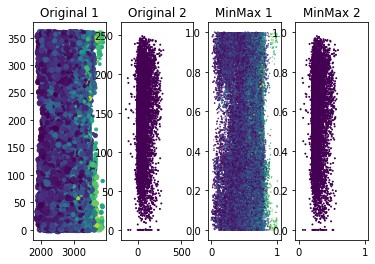

In [21]:
# Verify scale is good

fig, axes = plt.subplots(1,4)
axes[0].scatter(X_train['altitud'], X_train['azimut'], X_train['inclinacion'], X_train['DH_agua'])
axes[0].set_title("Original 1")
axes[1].scatter(X_train['DV_agua'], X_train['sombra_3pm'], X_train['Reserva_4'], X_train['reserva_2'])
axes[1].set_title("Original 2")
axes[2].scatter(X_train_scale[:, 0], X_train_scale[:, 1], X_train_scale[:, 2], X_train_scale[:, 3])
axes[2].set_title("MinMax 1")
axes[3].scatter(X_train_scale[:, 4], X_train_scale[:, 8], X_train_scale[:, 13], X_train_scale[:, 11])
axes[3].set_title("MinMax 2")
print("Checking if the scaling as been well done")
plt.show()

#-[5]. Reduction with PCA

In [22]:
from sklearn.decomposition import PCA

n_components = 10
# n_components = 0.5 
if n_components <= X_train_scale.shape[1]:
    pca = PCA(n_components = n_components)
    pca.fit(X_train_scale)
    X_proy = pca.transform(X_train_scale)
else:
    print("ERROR: the number of princial components has to be less or equal than data dimension !")

In [23]:
print(X_proy)

[[-0.81286563 -0.292003   -0.04182112 ... -0.25375451 -0.0671407
  -0.15649275]
 [-0.69744619 -0.22521472 -0.12999849 ...  0.26138818  0.10337842
   0.28368837]
 [-0.22183403  1.2571994   0.93876059 ... -0.11530858 -0.00954677
  -0.19413035]
 ...
 [ 0.61150324  0.19304989 -0.35646981 ...  0.58004134 -0.24400096
  -0.65156441]
 [-0.71604973 -0.1168817   0.05235239 ...  0.13836003  0.06652432
   0.08243308]
 [ 0.61223667  0.07497266 -0.33778454 ...  0.02260976 -0.02291475
   0.0476652 ]]


In [24]:
num_of_pc = len(pca.singular_values_)

strTitle = '\n First %d principal components' %(num_of_pc)
print(strTitle)
print(pca.components_.T)
strTitle = '\n First %d singular values ' %(num_of_pc)
print(strTitle)
print(pca.singular_values_.T)
strTitle = '\n Explained Variance Ratio'
print(strTitle)
print(pca.explained_variance_ratio_.T)
strTitle = '\n Accumulated Explained Variance Ratio'
print(strTitle)
print(np.cumsum(pca.explained_variance_ratio_.T))


 First 10 principal components
[[ 1.12517351e-02 -1.67091805e-01 -1.47768262e-01 -1.40262593e-01
   1.13973301e-02  4.48901487e-02  1.99112718e-01  6.54091920e-02
  -4.10382566e-02  3.64777440e-02]
 [-6.04942741e-02  1.16742975e-01  3.13140266e-01 -7.91904911e-01
  -1.66690700e-01 -1.74955281e-01 -5.54907674e-02 -5.00561334e-02
  -2.79602909e-04  6.06255751e-02]
 [-3.25088304e-02  5.00291860e-02  1.06357240e-01  6.64624459e-02
  -2.09360887e-02 -1.08795184e-01  1.39216026e-02 -1.72267068e-02
  -1.09037042e-01  3.87930790e-02]
 [-2.34971082e-02 -7.61843993e-02  1.18358966e-02 -2.11192427e-02
  -6.32025512e-02  2.00800876e-02  1.15050398e-01 -3.78342225e-02
   8.16379762e-02  9.22473327e-02]
 [-1.91342907e-02 -7.08465363e-03  3.33727052e-02  5.36800991e-03
  -3.47109548e-02 -2.31395709e-02  3.44340872e-02 -2.66664007e-02
   4.86074938e-03  3.75399280e-02]
 [ 1.25995311e-01 -2.09398978e-01 -7.05591933e-02 -1.55678228e-01
  -9.33430751e-02 -8.59999308e-02 -8.80292292e-02  4.46396571e-02
 

#-[6]. Learning with GradientBoosting ensemble

### Taking 10-20 min with google colaboratory

In [25]:
from sklearn.ensemble import GradientBoostingClassifier

max_depth = 20
n_estimators = 100
learning_rate= 0.2

gb_clf = GradientBoostingClassifier(max_depth=max_depth,        \
                                    n_estimators=n_estimators,  \
                                    learning_rate=learning_rate)

gb_clf.fit(X_train_scale, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.2, max_depth=20)

#-[7]. Testing the model with test dataset

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

Y_pred = gb_clf.predict(scaler.transform(X_valid))
cm = confusion_matrix(Y_valid, Y_pred)
cr = classification_report(Y_valid, Y_pred)

accuracy = accuracy_score(Y_valid, Y_pred)

print("accuracy = ",accuracy)
print()
print(cm)
print()
print(cr)

accuracy =  0.9358031065788908

[[ 7911   524     1     0     7     2    29]
 [  375 10875    34     0    26    18     4]
 [    0    43  1321    21     0    45     0]
 [    0     0    26    79     0     5     0]
 [    8   118     9     0   245     0     0]
 [    0    52    73    11     0   559     0]
 [   59     2     0     0     0     0   759]]

              precision    recall  f1-score   support

           1       0.95      0.93      0.94      8474
           2       0.94      0.96      0.95     11332
           3       0.90      0.92      0.91      1430
           4       0.71      0.72      0.71       110
           5       0.88      0.64      0.74       380
           6       0.89      0.80      0.84       695
           7       0.96      0.93      0.94       820

    accuracy                           0.94     23241
   macro avg       0.89      0.84      0.86     23241
weighted avg       0.94      0.94      0.94     23241



#-[8]. Generating "reto3_Ypred.csv" with the model

### Loading the dataset to be predicted

In [26]:
X_test_set = pd.read_csv('Datasets/reto3_testX.csv')

print("Loaded !")

Loaded !


### Scaling X_test_set dataset

In [28]:
X_test_set_scale = scaler.transform(X_test_set)

Checking if the scaling as been well done


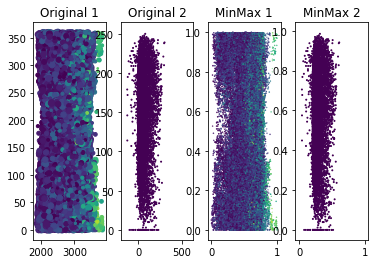

In [29]:
# Verify scale is good

fig, axes = plt.subplots(1,4)
axes[0].scatter(X_test_set['altitud'], X_test_set['azimut'], X_test_set['inclinacion'], X_test_set['DH_agua'])
axes[0].set_title("Original 1")
axes[1].scatter(X_test_set['DV_agua'], X_test_set['sombra_3pm'], X_test_set['Reserva_4'], X_test_set['reserva_2'])
axes[1].set_title("Original 2")
axes[2].scatter(X_test_set_scale[:, 0], X_test_set_scale[:, 1], X_test_set_scale[:, 2], X_test_set_scale[:, 3])
axes[2].set_title("MinMax 1")
axes[3].scatter(X_test_set_scale[:, 4], X_test_set_scale[:, 8], X_test_set_scale[:, 13], X_test_set_scale[:, 11])
axes[3].set_title("MinMax 2")
print("Checking if the scaling as been well done")
plt.show()

### Predict the values

In [32]:
Y_pred_final = gb_clf.predict(X_test_set_scale)

### Generating the reto3_Ypred.csv file

In [34]:
Y_pred_final = np.array(Y_pred_final)
# --- Save prediction in .csv file.
np.savetxt('Datasets/reto3_Ypred.csv', Y_pred_final, fmt='%i', delimiter=',')

#-[9]. Saving model with pickle

In [40]:
import pickle
from datetime import datetime

now = datetime.now()
date = now.strftime("%d-%m-%H:%M:%S")

filename = "Model_"
path_file = filename + date + ".sav"

pickle.dump(gb_clf, open(path_file, "wb"))